In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import files

In [ ]:
import folium

coordinates = [41.12, 14.10] # Coordinates of Pignataro Maggiore
map_osm = folium.Map(location = coordinates, zoom_start = 10) 

folium.Marker(location = coordinates).add_to(map_osm)
display(map_osm)
# map_osm.save("pignataro_map_2.html")
# files.download("pignataro_map_2.html") 

### A Primary

In [ ]:
A_Primary=pd.read_csv(r'/content/drive/MyDrive/A_Primary_08_01_2018_11_30_2020.csv')
A_Primary["created_at"] = pd.to_datetime(A_Primary["created_at"])
A_Primary = A_Primary.set_index("created_at")
A_Primary["anno"] = A_Primary.index.year
A_Primary["mese"] = A_Primary.index.month
A_Primary["giorno"] = A_Primary.index.day
A_Primary['datetime']= A_Primary.index.date
A_Primary['ora']= A_Primary.index.hour

x = A_Primary.groupby(["datetime","ora"])["PM10.0_CF1_ug/m3"].mean()

Ap_wide = x.unstack()
Ap_wide = Ap_wide.round(1)
Ap_wide['media_giorno_Ap'] = Ap_wide.mean(axis=1)

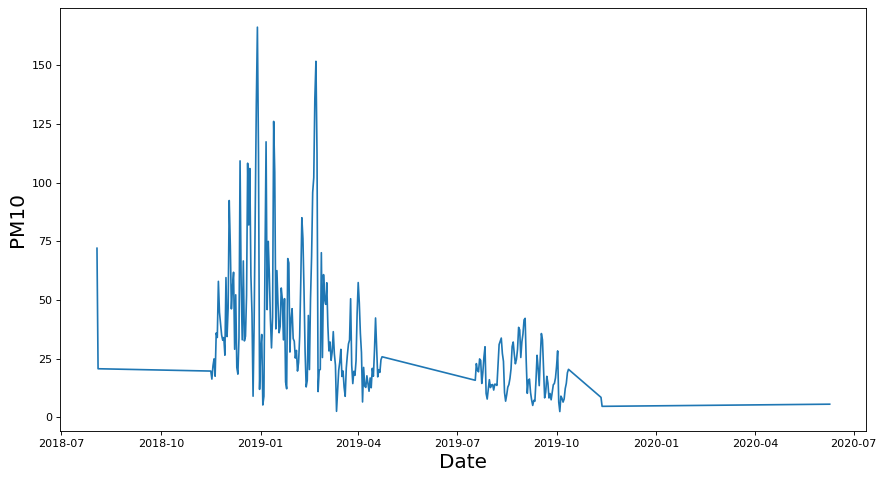

In [ ]:
plt.figure(figsize=(13, 7), dpi=80)
X = Ap_wide["media_giorno_Ap"]
plt.xlabel('Date', fontsize=18)
plt.ylabel('PM10', fontsize=18)
plt.plot(X)
# plt.savefig('A_Primary_PM10.png')
# files.download("A_Primary_PM10.png") 
plt.show()

### B Primary

In [ ]:
B_Primary=pd.read_csv(r'/content/drive/MyDrive/B_Primary_08_01_2018_11_30_2020.csv')
B_Primary["created_at"] = pd.to_datetime(B_Primary["created_at"])
B_Primary = B_Primary.set_index("created_at")
B_Primary["anno"] = B_Primary.index.year
B_Primary["mese"] =B_Primary.index.month
B_Primary["giorno"] = B_Primary.index.day
B_Primary['datetime']= B_Primary.index.date
B_Primary['ora']= B_Primary.index.hour

x = B_Primary.groupby(["datetime","ora"])["PM10.0_CF1_ug/m3"].mean()

Bp_wide = x.unstack()
Bp_wide = Bp_wide.round(1)
Bp_wide['media_giorno_Bp'] = Bp_wide.mean(axis=1)
Bp_wide = Bp_wide.round(1)
Bp_wide['media_giorno_Bp'] = Bp_wide.mean(axis=1)

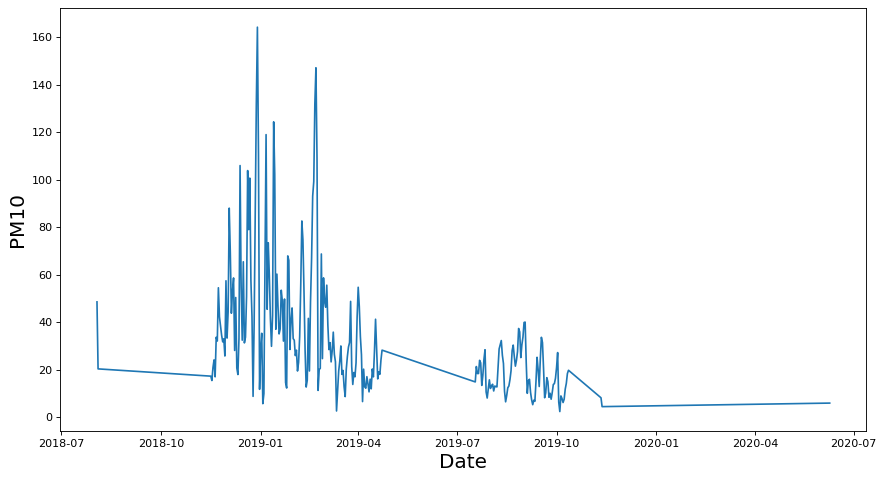

In [ ]:
plt.figure(figsize=(13, 7), dpi=80)
Y = Bp_wide["media_giorno_Bp"]
plt.xlabel('Date', fontsize=18)
plt.ylabel('PM10', fontsize=18)
plt.plot(Y)

# plt.savefig('B_Primary_PM10.png')
# files.download("B_Primary_PM10.png") 

plt.show()

### A Secondary

In [ ]:
A_Secondary = pd.read_csv(r'/content/drive/MyDrive/A_Secondary_08_01_2018_11_30_2020.csv')
A_Secondary["created_at"] = pd.to_datetime(A_Secondary["created_at"])
A_Secondary = A_Secondary.set_index("created_at")
A_Secondary["anno"] = A_Secondary.index.year
A_Secondary["mese"] = A_Secondary.index.month
A_Secondary["giorno"] = A_Secondary.index.day
A_Secondary['datetime'] = A_Secondary.index.date
A_Secondary['ora'] = A_Secondary.index.hour

x = A_Secondary.groupby(["datetime","ora"])["PM10_ATM_ug/m3"].mean()

As_wide = x.unstack()
As_wide = As_wide.round(1)
As_wide.head()
As_wide['media_giorno PM10_As'] = As_wide.mean(axis=1)

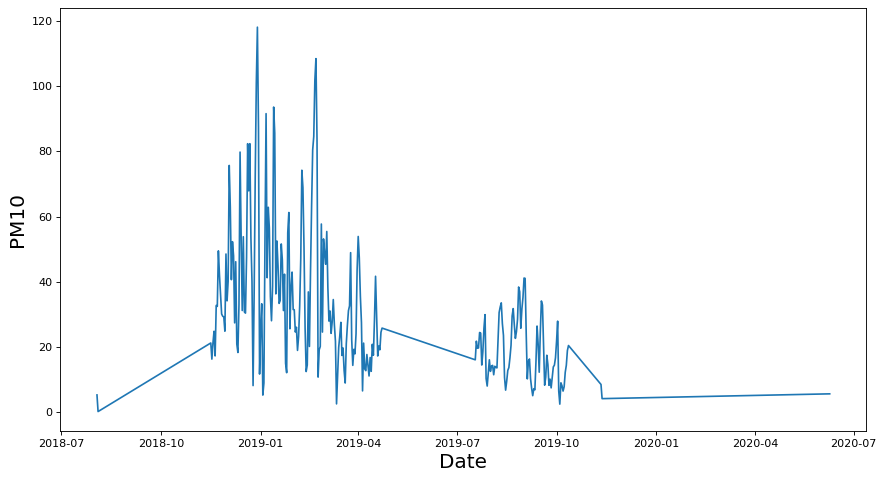

In [ ]:
plt.figure(figsize=(13, 7), dpi=80)
Z = As_wide["media_giorno PM10_As"]
plt.xlabel('Date', fontsize=18)
plt.ylabel('PM10', fontsize=18)
plt.plot(Z)

# plt.savefig('A_Secondary_PM10.png')
# files.download("A_Secondary_PM10.png") 

plt.show()

### B Secondary

In [ ]:
B_Secondary = pd.read_csv(r'/content/drive/MyDrive/B_Secondary_08_01_2018_11_30_2020.csv')
B_Secondary["created_at"] = pd.to_datetime(B_Secondary["created_at"])
B_Secondary = B_Secondary.set_index("created_at")
B_Secondary["anno"] = B_Secondary.index.year
B_Secondary["mese"] = B_Secondary.index.month
B_Secondary["giorno"] = B_Secondary.index.day
B_Secondary['datetime'] = B_Secondary.index.date
B_Secondary['ora'] = B_Secondary.index.hour

x = B_Secondary.groupby(["datetime","ora"])["PM10_ATM_ug/m3"].mean()

Bs_wide = x.unstack()
Bs_wide=Bs_wide.round(1)
Bs_wide.head()
Bs_wide['media_giorno PM10_Bs'] = Bs_wide.mean(axis=1)

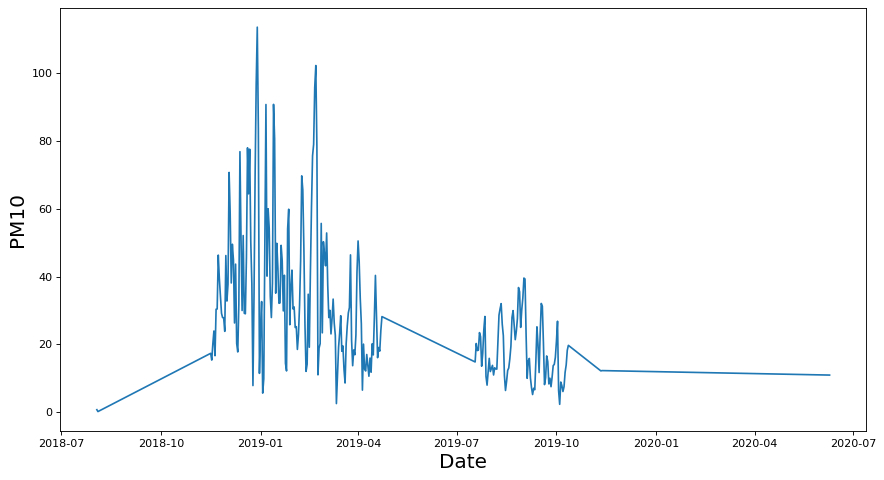

In [ ]:
plt.figure(figsize=(13, 7), dpi=80)
K = Bs_wide["media_giorno PM10_Bs"]
plt.xlabel('Date', fontsize=18)
plt.ylabel('PM10', fontsize=18)
plt.plot(K)

# plt.savefig('B_Secondary_PM10.png')
# files.download("B_Secondary_PM10.png") 

plt.show()

## Confronto PM10, PM1 e PM2.5

## PM10

In [ ]:
A_Primary = pd.read_csv(r'/content/drive/MyDrive/A_Primary_08_01_2018_11_30_2020.csv')
B_Primary = pd.read_csv(r'/content/drive/MyDrive/B_Primary_08_01_2018_11_30_2020.csv')
A_Secondary = pd.read_csv(r'/content/drive/MyDrive/A_Secondary_08_01_2018_11_30_2020.csv')
B_Secondary = pd.read_csv(r'/content/drive/MyDrive/B_Secondary_08_01_2018_11_30_2020.csv')

In [ ]:
#prima serie
A_Primary["created_at"] = pd.to_datetime(A_Primary["created_at"])
A_Primary = A_Primary.set_index("created_at") #in modo da eliminare le label automatiche con indice delle osservazioni
A_Primary["anno"] = A_Primary.index.year
A_Primary["giorno"] =A_Primary.index.day
A_Primary['datetime']=A_Primary.index.date
x = A_Primary.groupby(["datetime","giorno"])["PM10.0_CF1_ug/m3"].mean() #media gruppo data-ora
Ap_wide_PM10 = x.unstack()
Ap_wide_PM10=Ap_wide_PM10.round(1)
Ap_wide_PM10['media_giorno_Ap']=Ap_wide_PM10.mean(axis=1)

#seconda serie
B_Primary["created_at"] = pd.to_datetime(B_Primary["created_at"])
B_Primary = B_Primary.set_index("created_at") #in modo da eliminare le label automatiche con indice delle osservazioni
B_Primary["anno"] = B_Primary.index.year
B_Primary["giorno"] =B_Primary.index.day
B_Primary['datetime']=B_Primary.index.date
y = B_Primary.groupby(["datetime","giorno"])["PM10.0_CF1_ug/m3"].mean() #media gruppo data-ora
Bp_wide_PM10 = y.unstack()
Bp_wide_PM10=Bp_wide_PM10.round(1)
Bp_wide_PM10['media_giorno_Bp']=Bp_wide_PM10.mean(axis=1)

# terza serie
A_Secondary["created_at"] = pd.to_datetime(A_Secondary["created_at"])
A_Secondary = A_Secondary.set_index("created_at") #in modo da eliminare le label automatiche con indice delle osservazioni
A_Secondary["anno"] = A_Secondary.index.year
A_Secondary["giorno"] =A_Secondary.index.day
A_Secondary['datetime']=A_Secondary.index.date
z = A_Secondary.groupby(["datetime","giorno"])["PM10_ATM_ug/m3"].mean() #media gruppo data-ora
As_wide_PM10 = z.unstack()
As_wide_PM10=As_wide_PM10.round(1)
As_wide_PM10['media_giorno_As']=As_wide_PM10.mean(axis=1)

# quarta serie
B_Secondary["created_at"] = pd.to_datetime(B_Secondary["created_at"])
B_Secondary = B_Secondary.set_index("created_at") #in modo da eliminare le label automatiche con indice delle osservazioni
B_Secondary["anno"] = B_Secondary.index.year
B_Secondary["giorno"] =B_Secondary.index.day
B_Secondary['datetime']=B_Secondary.index.date
k = B_Secondary.groupby(["datetime","giorno"])["PM10_ATM_ug/m3"].mean() #media gruppo data-ora
Bs_wide_PM10 = k.unstack()
Bs_wide_PM10=Bs_wide_PM10.round(1)
Bs_wide_PM10['media_giorno_Bs']=Bs_wide_PM10.mean(axis=1)

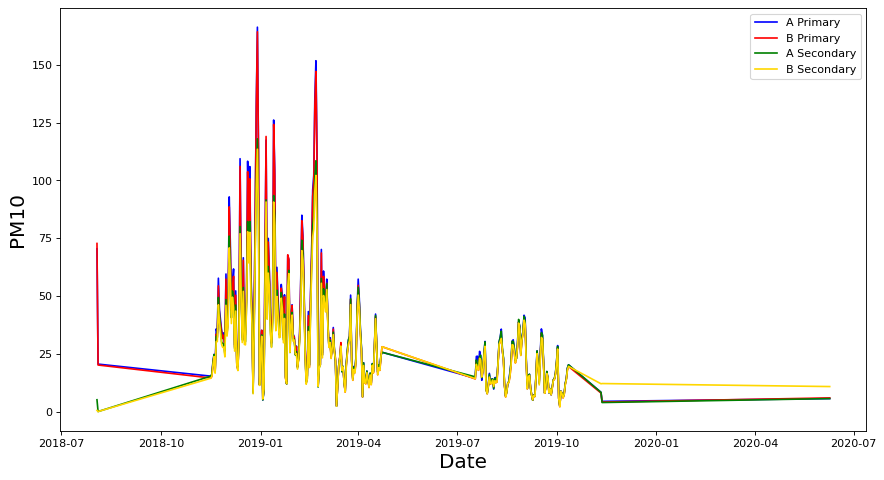

In [ ]:
plt.figure(figsize=(13, 7), dpi=80)
#plt.title('Serie PM1.0 delle quattro diverse centraline')
plt.plot(Ap_wide_PM10['media_giorno_Ap'], color = 'blue', label = 'A Primary')
plt.plot(Bp_wide_PM10['media_giorno_Bp'], color = 'red', label = 'B Primary')
plt.plot(As_wide_PM10['media_giorno_As'], color = 'green', label = 'A Secondary')
plt.plot(Bs_wide_PM10['media_giorno_Bs'], color = 'gold', label = 'B Secondary')
plt.xlabel('Date', fontsize=18)
plt.ylabel('PM10', fontsize=18)
plt.legend(loc = 'upper right')

# plt.savefig('Confronto_PM10.png')
# files.download("Confronto_PM10.png") 

plt.show()

# PM1

In [ ]:
A_Primary = pd.read_csv(r'/content/drive/MyDrive/A_Primary_08_01_2018_11_30_2020.csv')
B_Primary = pd.read_csv(r'/content/drive/MyDrive/B_Primary_08_01_2018_11_30_2020.csv')
A_Secondary = pd.read_csv(r'/content/drive/MyDrive/A_Secondary_08_01_2018_11_30_2020.csv')
B_Secondary = pd.read_csv(r'/content/drive/MyDrive/B_Secondary_08_01_2018_11_30_2020.csv')

In [ ]:
#prima serie
A_Primary["created_at"] = pd.to_datetime(A_Primary["created_at"])
A_Primary = A_Primary.set_index("created_at") #in modo da eliminare le label automatiche con indice delle osservazioni
A_Primary["anno"] = A_Primary.index.year
A_Primary["giorno"] =A_Primary.index.day
A_Primary['datetime']=A_Primary.index.date
x = A_Primary.groupby(["datetime","giorno"])["PM1.0_CF1_ug/m3"].mean() #media gruppo data-ora
Ap_wide_PM1 = x.unstack()
Ap_wide_PM1=Ap_wide_PM1.round(1)
Ap_wide_PM1['media_giorno_Ap']=Ap_wide_PM1.mean(axis=1)

#seconda serie
B_Primary["created_at"] = pd.to_datetime(B_Primary["created_at"])
B_Primary = B_Primary.set_index("created_at") #in modo da eliminare le label automatiche con indice delle osservazioni
B_Primary["anno"] = B_Primary.index.year
B_Primary["giorno"] =B_Primary.index.day
B_Primary['datetime']=B_Primary.index.date
y = B_Primary.groupby(["datetime","giorno"])["PM1.0_CF1_ug/m3"].mean() #media gruppo data-ora
Bp_wide_PM1 = y.unstack()
Bp_wide_PM1=Bp_wide_PM1.round(1)
Bp_wide_PM1['media_giorno_Bp']=Bp_wide_PM1.mean(axis=1)

# terza serie
A_Secondary["created_at"] = pd.to_datetime(A_Secondary["created_at"])
A_Secondary = A_Secondary.set_index("created_at") #in modo da eliminare le label automatiche con indice delle osservazioni
A_Secondary["anno"] = A_Secondary.index.year
A_Secondary["giorno"] =A_Secondary.index.day
A_Secondary['datetime']=A_Secondary.index.date
z = A_Secondary.groupby(["datetime","giorno"])["PM1.0_ATM_ug/m3"].mean() #media gruppo data-ora
As_wide_PM1 = z.unstack()
As_wide_PM1=As_wide_PM1.round(1)
As_wide_PM1['media_giorno_As']=As_wide_PM1.mean(axis=1)

# quarta serie
B_Secondary["created_at"] = pd.to_datetime(B_Secondary["created_at"])
B_Secondary = B_Secondary.set_index("created_at") #in modo da eliminare le label automatiche con indice delle osservazioni
B_Secondary["anno"] = B_Secondary.index.year
B_Secondary["giorno"] =B_Secondary.index.day
B_Secondary['datetime']=B_Secondary.index.date
k = B_Secondary.groupby(["datetime","giorno"])["PM1.0_ATM_ug/m3"].mean() #media gruppo data-ora
Bs_wide_PM1 = k.unstack()
Bs_wide_PM1=Bs_wide_PM1.round(1)
Bs_wide_PM1['media_giorno_Bs']=Bs_wide_PM1.mean(axis=1)

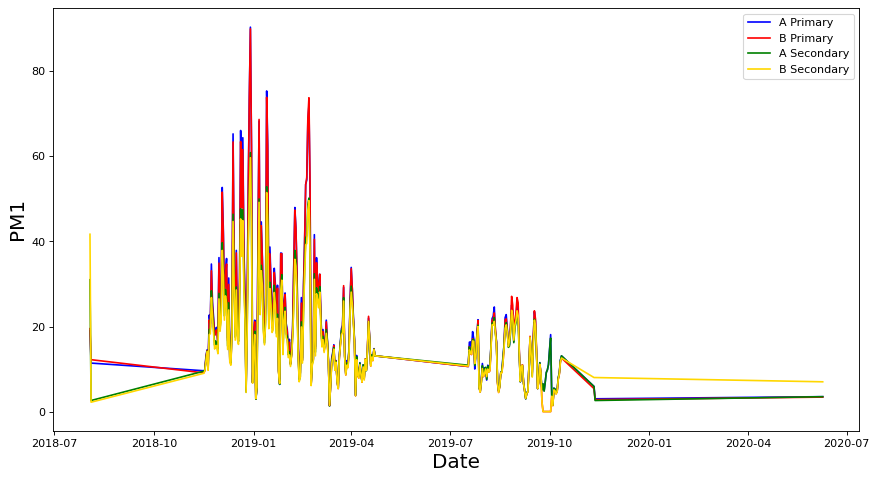

In [ ]:
plt.figure(figsize=(13, 7), dpi=80)
#plt.title('Serie PM1.0 delle quattro diverse centraline')
plt.plot(Ap_wide_PM1['media_giorno_Ap'], color = 'blue', label = 'A Primary')
plt.plot(Bp_wide_PM1['media_giorno_Bp'], color = 'red', label = 'B Primary')
plt.plot(As_wide_PM1['media_giorno_As'], color = 'green', label = 'A Secondary')
plt.plot(Bs_wide_PM1['media_giorno_Bs'], color = 'gold', label = 'B Secondary')
plt.xlabel('Date', fontsize=18)
plt.ylabel('PM1', fontsize=18)
plt.legend(loc = 'upper right')

# plt.savefig('Confronto_PM1.png')
# files.download("Confronto_PM1.png") 

plt.show()

# PM2.5

In [ ]:
A_Primary = pd.read_csv(r'/content/drive/MyDrive/A_Primary_08_01_2018_11_30_2020.csv')
B_Primary = pd.read_csv(r'/content/drive/MyDrive/B_Primary_08_01_2018_11_30_2020.csv')

In [ ]:
#prima serie
A_Primary["created_at"] = pd.to_datetime(A_Primary["created_at"])
A_Primary = A_Primary.set_index("created_at") #in modo da eliminare le label automatiche con indice delle osservazioni
A_Primary["anno"] = A_Primary.index.year
A_Primary["giorno"] =A_Primary.index.day
A_Primary['datetime']=A_Primary.index.date
x = A_Primary.groupby(["datetime","giorno"])["PM2.5_ATM_ug/m3"].mean() #media gruppo data-ora
Ap_wide_PM25 = x.unstack()
Ap_wide_PM25=Ap_wide_PM25.round(1)
Ap_wide_PM25['media_giorno_Ap']=Ap_wide_PM25.mean(axis=1)

#seconda serie
B_Primary["created_at"] = pd.to_datetime(B_Primary["created_at"])
B_Primary = B_Primary.set_index("created_at") #in modo da eliminare le label automatiche con indice delle osservazioni
B_Primary["anno"] = B_Primary.index.year
B_Primary["giorno"] =B_Primary.index.day
B_Primary['datetime']=B_Primary.index.date
y = B_Primary.groupby(["datetime","giorno"])["PM2.5_ATM_ug/m3"].mean() #media gruppo data-ora
Bp_wide_PM25 = y.unstack()
Bp_wide_PM25=Bp_wide_PM25.round(1)
Bp_wide_PM25['media_giorno_Bp']=Bp_wide_PM25.mean(axis=1)

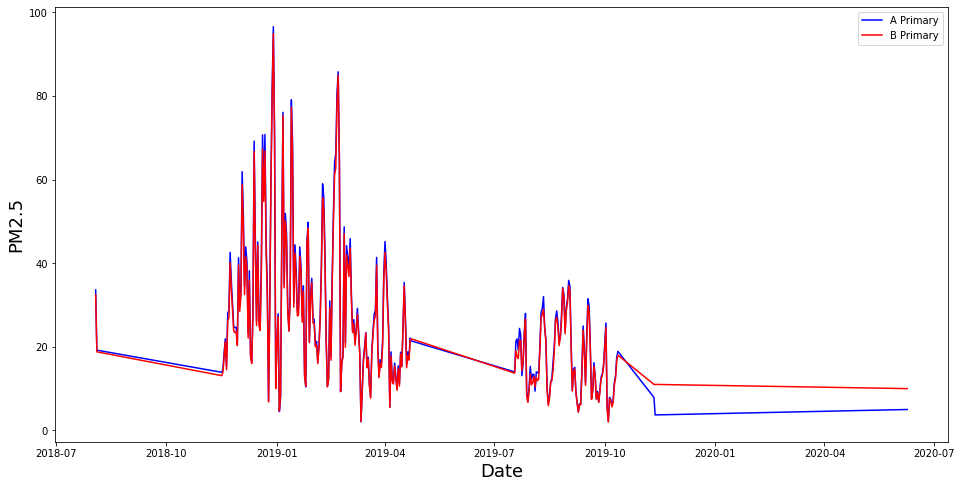

In [ ]:
plt.figure(figsize=(16,8))
#plt.title('Serie PM2.5 delle centraline A_Primary ed A_Secondary')
plt.plot(Ap_wide_PM25['media_giorno_Ap'], color = 'blue', label = 'A Primary')
plt.plot(Bp_wide_PM25['media_giorno_Bp'], color = 'red', label = 'B Primary')
plt.xlabel('Date', fontsize=18)
plt.ylabel('PM2.5', fontsize=18)
plt.legend(loc = 'upper right')

# plt.savefig('Confronto_PM25.png')
# files.download("Confronto_PM25.png") 

plt.show()

## Serie PM10 con media dei dati giornalieri delle quattro serie

In [ ]:
df = pd.concat((Ap_wide_PM10['media_giorno_Ap'], Bp_wide_PM10['media_giorno_Bp'], As_wide_PM10['media_giorno_As'], Bs_wide_PM10['media_giorno_Bs']), axis = 0)
df = pd.DataFrame(df.groupby(['datetime']).mean())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

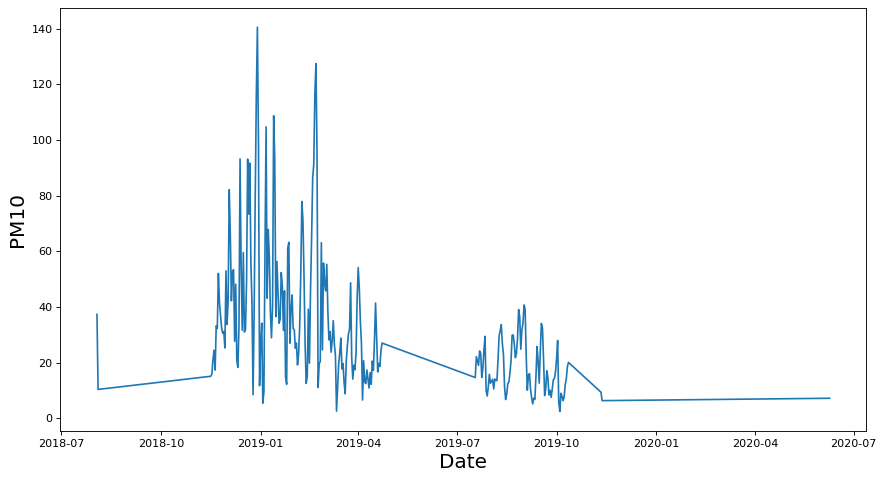

In [ ]:
plt.figure(figsize=(13, 7), dpi=80)
W = df[0]
plt.xlabel('Date', fontsize=18)
plt.ylabel('PM10', fontsize=18)
plt.plot(W)

plt.savefig('Mean_PM10.png')
files.download("Mean_PM10.png") 

plt.show()

## Occorre valutare l'impiego di dati da altre fonti per tappare i buchi della centralina di Pignataro

In [ ]:
Scuola_De_Amicis=pd.read_csv(r'/content/drive/MyDrive/dati_caserta1.txt')

Scuola_De_Amicis['datetime']=pd.to_datetime(dict(year=Scuola_De_Amicis.anno, month=Scuola_De_Amicis.mese, day=Scuola_De_Amicis.giorno))
Scuola_De_Amicis["g_sett"] = Scuola_De_Amicis['datetime'].dt.weekday #[0=lun, 1=mar 2=mer 3=gio 4=ven 5=sab 6=dom]
Scuola_De_Amicis["settimana"] = Scuola_De_Amicis['datetime'].dt.isocalendar().week
Scuola_De_Amicis['valore'] = Scuola_De_Amicis['valore'].replace('-', np.nan)
Scuola_De_Amicis['valore'] = pd.to_numeric(Scuola_De_Amicis['valore'])
Scuola_De_Amicis = Scuola_De_Amicis[Scuola_De_Amicis['valore'].notna()]
Scuola_De_Amicis.sort_values(by=['datetime'], inplace=True, ascending=True)
pm_10_de_amicis = Scuola_De_Amicis.groupby(["datetime"])["valore"].mean() # la media in realtà non è altro che il valore stesso

In [ ]:
# apro la serie di Sparanise

PM10_sparanise = pd.read_excel(r'/content/drive/MyDrive/serie_sparanise.xlsx')
# PM10_sparanise = PM10_sparanise.set_index(pd.date_range(start='2019/02/01', periods=299))
# PM10_sparanise
PM10_sparanise = PM10_sparanise.set_index('datetime')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

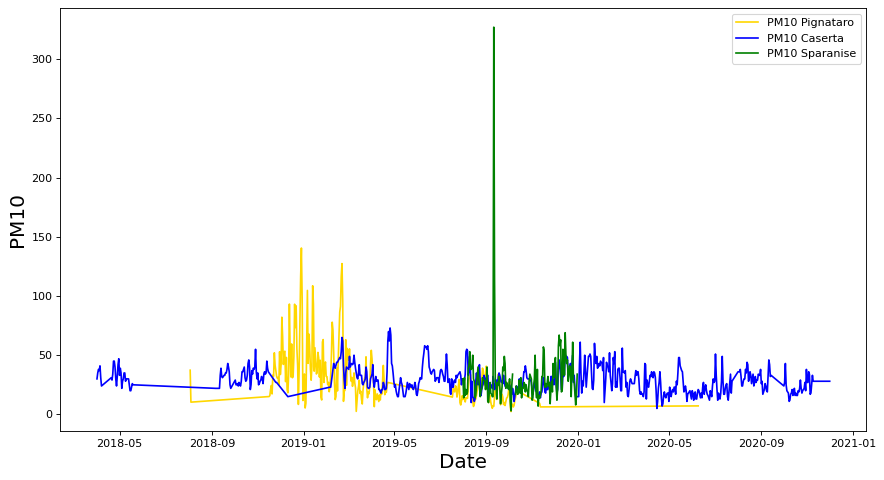

In [ ]:
plt.figure(figsize=(13, 7), dpi=80)
#plt.title('Serie PM1.0 delle quattro diverse centraline')
#plt.plot(Ap_wide["media_giorno_Ap"], color = 'gold')
plt.plot(W, color = 'gold', label = 'PM10 Pignataro')
plt.plot(pm_10_de_amicis, color = 'blue', label = 'PM10 Caserta')
plt.plot(PM10_sparanise, color = 'green', label = 'PM10 Sparanise')
plt.xlabel('Date', fontsize=18)
plt.ylabel('PM10', fontsize=18)
plt.legend(loc = 'upper right')

plt.savefig('pignataro_caserta_sparanise.png')
files.download("pignataro_caserta_sparanise.png") 

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

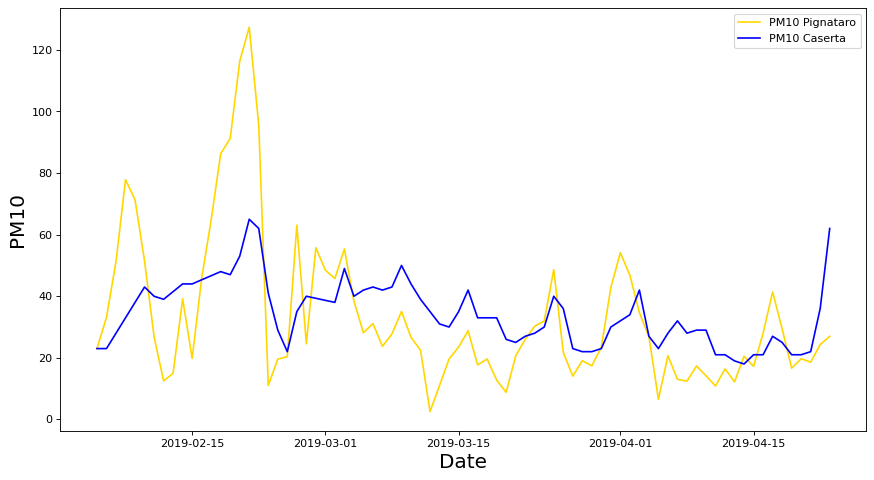

In [ ]:
# plotto soltanto la prima parte della serie per vederla meglio

# W.iloc[82:160] # dal 5 febbraio al 23 aprile
# pm_10_de_amicis.iloc[100:237] # dal 5 febbraio al 23 aprile

plt.figure(figsize=(13, 7), dpi=80)
#plt.title('Serie PM1.0 delle quattro diverse centraline')
#plt.plot(Ap_wide["media_giorno_Ap"], color = 'gold')
plt.plot(W.iloc[82:160], color = 'gold', label = 'PM10 Pignataro')
plt.plot(pm_10_de_amicis[100:169], color = 'blue', label = 'PM10 Caserta')
#plt.plot(PM10_sparanise[4:150], color = 'green', label = 'PM10 Sparanise')
plt.xlabel('Date', fontsize=18)
plt.ylabel('PM10', fontsize=18)
plt.legend(loc = 'upper right')

plt.savefig('pignataro_caserta.png')
files.download("pignataro_caserta.png") 

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

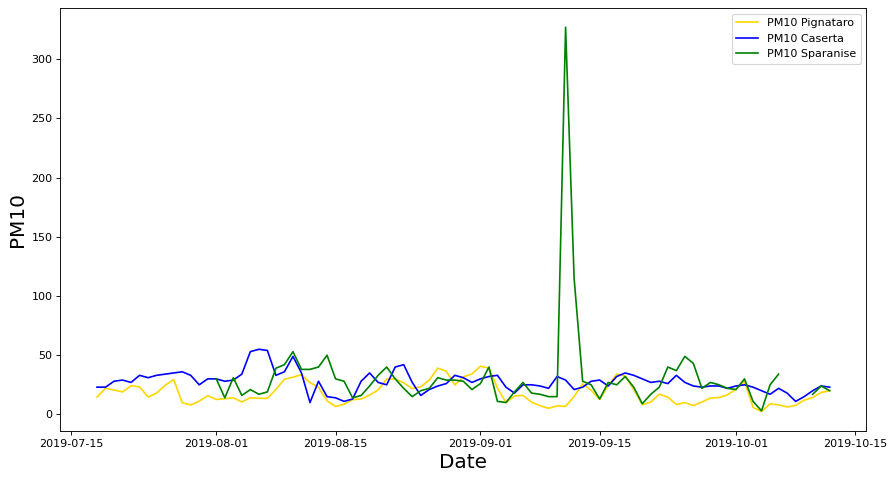

In [ ]:
# plotto la seconda parte

# W.iloc[160:-3] # dal 18 luglio al 12 ottobre
# pm_10_de_amicis.iloc[254:341] # dal 18 luglio al 12 ottobre
# PM10_sparanise.iloc # da 01/08 a 12/10

plt.figure(figsize=(13, 7), dpi=80)
#plt.title('Serie PM1.0 delle quattro diverse centraline')
#plt.plot(Ap_wide["media_giorno_Ap"], color = 'gold')
plt.plot(W.iloc[160:-3], color = 'gold', label = 'PM10 Pignataro')
plt.plot(pm_10_de_amicis[254:341], color = 'blue', label = 'PM10 Caserta')
plt.plot(PM10_sparanise[:-80], color = 'green', label = 'PM10 Sparanise')
plt.xlabel('Date', fontsize=18)
plt.ylabel('PM10', fontsize=18)
plt.legend(loc = 'upper right')

plt.savefig('pignataro_caserta_sparanise_2.png')
files.download("pignataro_caserta_sparanise_2.png") 

plt.show()

In [ ]:
# Kolmogorov-Smirnov Test
from scipy.stats import ks_2samp

#-----------------------------------------------------------------------
# PRIMA PARTE DELLA SERIE

print(ks_2samp(W.iloc[82:160], pm_10_de_amicis[100:237])) # pignataro - caserta, 05/02-23/04

#-----------------------------------------------------------------------
# SECONDA PARTE DELLA SERIE 

print(ks_2samp(W.iloc[174:-3], pm_10_de_amicis[268:341])) # pignataro - caserta, 01/08-12/10
print(ks_2samp(W.iloc[174:-3], PM10_sparanise[:-80].values.squeeze().shape)) # pignataro - sparanise, 01/08-12/10

Ks_2sampResult(statistic=0.2952461164139996, pvalue=0.00024341736357391675)
Ks_2sampResult(statistic=0.4794520547945205, pvalue=5.768309386891226e-08)
Ks_2sampResult(statistic=1.0, pvalue=0.027027027027027084)


## Integro i giorni mancanti con quelli del PM10 rilevati dalla centralina sopra la scuola De Amicis di Caserta e di Sparanise

In [ ]:
Scuola_De_Amicis=pd.read_csv(r'/content/drive/MyDrive/dati_caserta1.txt')
# prendo solo i mesi che mi servono
Scuola_De_Amicis=Scuola_De_Amicis[(Scuola_De_Amicis['anno']==2019) & (Scuola_De_Amicis['mese']>=4) & (Scuola_De_Amicis['mese']<12)]
# cancello manualmente le date che non mi servono
Scuola_De_Amicis = Scuola_De_Amicis.drop([612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633])
#maggio e giugno mi servono interamente
Scuola_De_Amicis = Scuola_De_Amicis.drop([536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549])
Scuola_De_Amicis = Scuola_De_Amicis.drop([488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518])
Scuola_De_Amicis = Scuola_De_Amicis.drop([458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487])
Scuola_De_Amicis = Scuola_De_Amicis.drop([427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438])
Scuola_De_Amicis = Scuola_De_Amicis.drop([407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426])
Scuola_De_Amicis = Scuola_De_Amicis.drop([611])
Scuola_De_Amicis['datetime']=pd.to_datetime(dict(year=Scuola_De_Amicis.anno, month=Scuola_De_Amicis.mese, day=Scuola_De_Amicis.giorno))
Scuola_De_Amicis["g_sett"] = Scuola_De_Amicis['datetime'].dt.weekday #[0=lun, 1=mar 2=mer 3=gio 4=ven 5=sab 6=dom]
Scuola_De_Amicis["settimana"] = Scuola_De_Amicis['datetime'].dt.isocalendar().week
Scuola_De_Amicis['valore'] = Scuola_De_Amicis['valore'].replace('-', np.nan)
Scuola_De_Amicis['valore'] = pd.to_numeric(Scuola_De_Amicis['valore'])
# seleziono le tranches in ordine
Scuola_De_Amicis_1 = Scuola_De_Amicis.drop([397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457])
Scuola_De_Amicis_2 = Scuola_De_Amicis.drop([519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 634, 635, 636, 637, 638, 639, 640]) #ultimi mesi di Caserta

In [ ]:
x_1 = Scuola_De_Amicis_1.groupby(["datetime", "giorno"])["valore"].mean() #media gruppo data-ora ,"giorno"
x_2 = Scuola_De_Amicis_2.groupby(["datetime", "giorno"])["valore"].mean()
Caserta_wide_1 = x_1.unstack()
Caserta_wide_2 = x_2.unstack()
Caserta_wide_1=Caserta_wide_1.round(0)
Caserta_wide_2=Caserta_wide_2.round(0)
Caserta_wide_1[0]=Caserta_wide_1.mean(axis=1) # ok
Caserta_wide_2[0]=Caserta_wide_2.mean(axis=1) # ok
Caserta_wide_1[0].astype(int)
Caserta_wide_2[0].astype(int)

datetime
2019-10-13    20
2019-10-14    23
2019-10-15    30
2019-10-16    20
2019-10-17    20
2019-10-18    22
2019-10-19    23
2019-10-20    28
2019-10-21    36
2019-10-22    36
2019-10-23    41
2019-10-24    37
2019-10-25    31
2019-10-26    30
2019-10-27    30
2019-10-28    30
2019-10-29    29
2019-10-30    29
2019-10-31    27
2019-11-01    21
2019-11-02    17
2019-11-03    21
2019-11-04    25
2019-11-05    30
2019-11-06    20
2019-11-07    19
2019-11-08    18
2019-11-09    14
2019-11-10    15
Name: 0, dtype: int64

In [ ]:
Scuola_De_Amicis=pd.read_csv(r'/content/drive/MyDrive/dati_caserta1.txt')
# prendo solo i mesi che mi servono
Scuola_De_Amicis=Scuola_De_Amicis[(Scuola_De_Amicis['anno']==2019) & (Scuola_De_Amicis['mese']>=4) & (Scuola_De_Amicis['mese']<12)]

Scuola_De_Amicis['datetime']=pd.to_datetime(dict(year=Scuola_De_Amicis.anno, month=Scuola_De_Amicis.mese, day=Scuola_De_Amicis.giorno))
Scuola_De_Amicis["g_sett"] = Scuola_De_Amicis['datetime'].dt.weekday #[0=lun, 1=mar 2=mer 3=gio 4=ven 5=sab 6=dom]
Scuola_De_Amicis["settimana"] = Scuola_De_Amicis['datetime'].dt.isocalendar().week
Scuola_De_Amicis['valore'] = Scuola_De_Amicis['valore'].replace('-', np.nan)
Scuola_De_Amicis['valore'] = pd.to_numeric(Scuola_De_Amicis['valore'])
Caserta_wide_3 = Scuola_De_Amicis.iloc[12:30]['valore']
Caserta_wide_3.index = [pd.date_range(start='2019/11/13', periods=18)]
Caserta_wide_3 = Caserta_wide_3.astype(int)
Caserta_wide_3

2019-11-13    18
2019-11-14    19
2019-11-15    25
2019-11-16    31
2019-11-17    27
2019-11-18    19
2019-11-19    18
2019-11-20    24
2019-11-21    21
2019-11-22    21
2019-11-23    26
2019-11-24    25
2019-11-25    19
2019-11-26    32
2019-11-27    32
2019-11-28    27
2019-11-29    29
2019-11-30    25
Name: valore, dtype: int64

In [ ]:
# W_dicembre_2018 = W.iloc[16:47]
W_1 = W.iloc[47:160] # da 01/01 al 23/04 -> servono i dati dal 24/04 al 17/07 (Caserta_wide_1)
W_2 = W.iloc[160:247] # da 18/07 al 12/10 -> servono i dati dal 13/10 al 10/11 (Caserta_wide_2)
W_3 = W.iloc[247:-1] # 11/11 e 12/11 -> servono i dati dal 13/11 al 31/12 (Caserta_wide_3 fino al 30/11)
W_1 = W_1.round(1)
W_2 = W_2.round(1)
W_3 = W_3.round(1)

In [ ]:
W_1 = W_1.astype(int)
W_2 = W_2.astype(int)
W_3 = W_3.astype(int)

In [ ]:
effe = pd.concat((W_1, Caserta_wide_1, W_2, Caserta_wide_2, W_3, Caserta_wide_3), axis = 0) 
pm10_f = effe[0]
pm10_f.index = [pd.date_range(start='2019/01/01', periods=334)]

In [ ]:
pm10_f = pm10_f.astype(int)
pm10_f

2019-01-01    27
2019-01-02    34
2019-01-03     5
2019-01-04     9
2019-01-05    59
              ..
2019-11-26    32
2019-11-27    32
2019-11-28    27
2019-11-29    29
2019-11-30    25
Name: 0, Length: 334, dtype: int64

### Per i dati di dicembre uso quelli di Sparanise

In [ ]:
PM10_sparanise = pd.read_excel(r'/content/drive/MyDrive/serie_sparanise.xlsx')

PM10_sparanise = PM10_sparanise.set_index('datetime')
Sparanise_wide_dicembre = PM10_sparanise.rename(columns = {'pm10': '0'}).iloc[-31:]['0']

In [ ]:
Sparanise_wide_dicembre = Sparanise_wide_dicembre.astype(int)
Sparanise_wide_dicembre

datetime
2019-12-01    42
2019-12-02    48
2019-12-03    26
2019-12-04    12
2019-12-05    22
2019-12-06    58
2019-12-07    67
2019-12-08    58
2019-12-09    63
2019-12-10    19
2019-12-11    20
2019-12-12    55
2019-12-13    50
2019-12-14    33
2019-12-15    69
2019-12-16    50
2019-12-17    43
2019-12-18    46
2019-12-19    28
2019-12-20    34
2019-12-21    41
2019-12-22    37
2019-12-23    15
2019-12-24    36
2019-12-25    61
2019-12-26    29
2019-12-27    27
2019-12-28    17
2019-12-29     8
2019-12-30    15
2019-12-31    34
Name: 0, dtype: int64

In [ ]:
pm10 = pd.concat((pm10_f, Sparanise_wide_dicembre), axis = 0)
#PM10_sparanise['pm10']
pm10.index = [pd.date_range(start='2019/01/01', periods=365)]
pm10.head(10)

2019-01-01     27
2019-01-02     34
2019-01-03      5
2019-01-04      9
2019-01-05     59
2019-01-06    104
2019-01-07     43
2019-01-08     67
2019-01-09     57
2019-01-10     38
dtype: int64

In [ ]:
# scarico la serie che inserirò nello spreadsheet dataset_finale
# pm10.to_excel('/content/drive/MyDrive/pm10.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

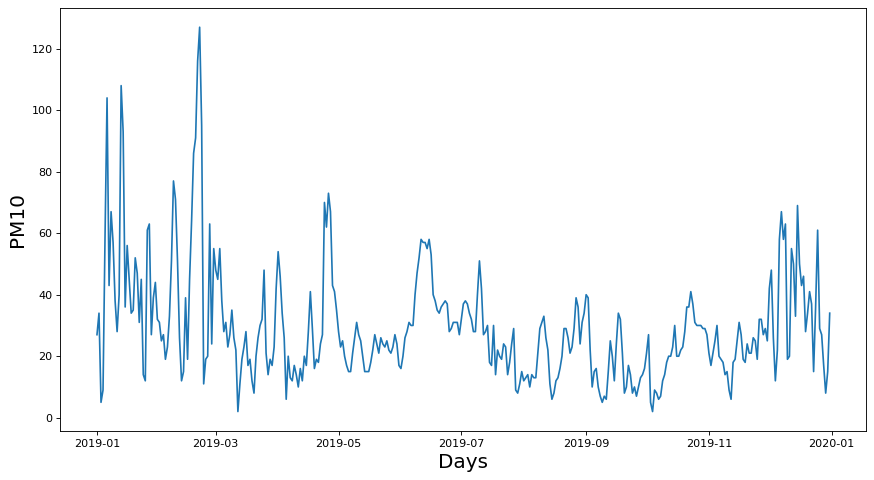

In [ ]:
df = pd.read_excel(r'/content/drive/MyDrive/dataset_finale.xlsx', index_col = 'datetime')
df
# df = df.set_index('datetime')
# #df
total_PM10 = df['PM10']
# #total_PM10 = total_PM10.values.split(',')
plt.figure(figsize=(13, 7), dpi=80)
plt.xlabel('Days', fontsize=18)
plt.ylabel('PM10', fontsize=18)
plt.plot(total_PM10)

plt.savefig('Esaustivo_PM10.png')
files.download("Esaustivo_PM10.png") 
plt.show()

## Studio pressione da B Primary

In [ ]:
B_Primary=pd.read_csv(r'/content/drive/MyDrive/B_Primary_08_01_2018_11_30_2020.csv')
B_Primary["created_at"] = pd.to_datetime(B_Primary["created_at"])
B_Primary = B_Primary.set_index("created_at")
B_Primary["anno"] = B_Primary.index.year
B_Primary["mese"] =B_Primary.index.month
B_Primary["giorno"] = B_Primary.index.day
B_Primary['datetime']= B_Primary.index.date
B_Primary['ora']= B_Primary.index.hour

In [ ]:
x_2 = B_Primary.groupby(["datetime"])["Pressure_hpa"].mean() # ,"ora"
print('Il numero di osservazioni giornaliere di partenza in cui non ci sono rilevazioni sulla pressione è pari a ' + str(x_2.isna().count()))
# x_2.iloc[47:249].to_csv('/content/drive/MyDrive/x_2.iloc[47:249].csv') # la esporto in csv per vedere i giorni mancanti
# manca il 23/02, dal 17/03 al 18/03, dal 24/04 al 17/07, dal 13/10 al 10/11 e dal 13/11 al 31/12
# per i giorni mancanti uso dati presi da internet per il territorio di Pignataro Maggiore
#esaustivo_con_vento_e_pressione = pd.read_excel(r'/content/drive/MyDrive/esaustivo_con_vento_e_pressione.xlsx') # qui ci sono dati presi da internet
esaustivo_con_vento_e_pressione = pd.read_excel(r'/content/drive/MyDrive/dataset_finale.xlsx') # qui ci sono dati presi da internet
# ottengo i 'pezzi' della serie
mask_1 = esaustivo_con_vento_e_pressione['datetime'] == '2019-02-23'
a = esaustivo_con_vento_e_pressione.loc[mask_1]
mask_2 = (esaustivo_con_vento_e_pressione['datetime'] >= '2019-03-17') & (esaustivo_con_vento_e_pressione['datetime'] <= '2019-03-18') 
e = esaustivo_con_vento_e_pressione.loc[mask_2]
mask_3 = (esaustivo_con_vento_e_pressione['datetime'] >= '2019-04-24') & (esaustivo_con_vento_e_pressione['datetime'] <= '2019-07-17') 
i = esaustivo_con_vento_e_pressione.loc[mask_3]
mask_4 = (esaustivo_con_vento_e_pressione['datetime'] >= '2019-10-13') & (esaustivo_con_vento_e_pressione['datetime'] <= '2019-11-10') 
o = esaustivo_con_vento_e_pressione.loc[mask_4]
mask_5 = (esaustivo_con_vento_e_pressione['datetime'] >= '2019-11-13') & (esaustivo_con_vento_e_pressione['datetime'] <= '2019-12-31') 
u = esaustivo_con_vento_e_pressione.loc[mask_5]
# 'spezzetto' anche x_2
# x_2.to_csv('/content/drive/MyDrive/x_2.csv') la esporto in csv per vedere i giorni mancanti
aa = x_2.iloc[47:100]
ee = x_2.iloc[101:122]
ii = x_2.iloc[124:160]
oo = x_2[160:247]
uu = x_2.iloc[247:-1]
# concateno i pezzi
pressione = pd.DataFrame(pd.concat((aa, a.Pressione, ee, e.Pressione, ii, i.Pressione, oo, o.Pressione, uu, u.Pressione), axis = 0))
pressione = pressione.reset_index()
pressione = pressione.set_index(pd.date_range(start='2019/01/01', periods=365))
pressione = pressione.drop(columns = 'index')
pressione = pressione.rename(columns = {0: 'pressione'})
pressione

Il numero di osservazioni giornaliere di partenza in cui non ci sono rilevazioni sulla pressione è pari a 250


,pressione
2019-01-01,1013.082593
2019-01-02,1005.299148
2019-01-03,1011.655690
2019-01-04,1015.716558
2019-01-05,1011.717609
...,...
2019-12-27,1021.000000
2019-12-28,1025.000000
2019-12-29,1027.000000
2019-12-30,1028.000000


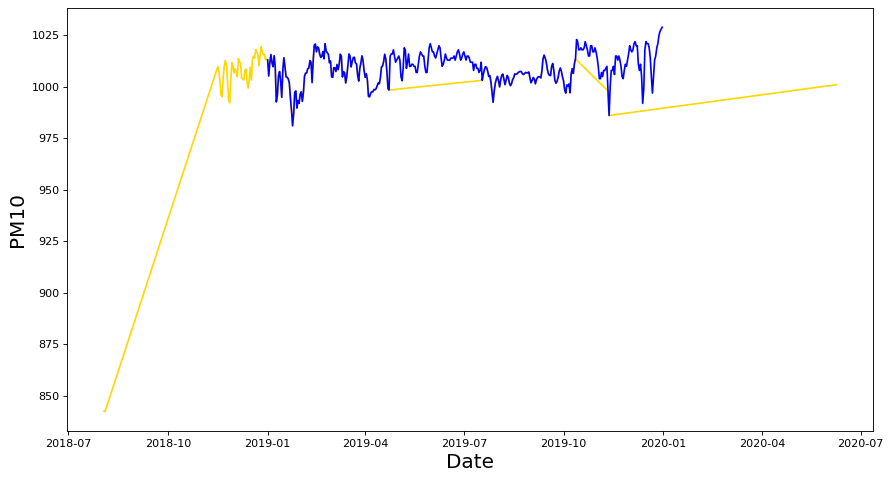

In [ ]:
plt.figure(figsize=(13, 7), dpi=80)
#plt.title('Serie PM1.0 delle quattro diverse centraline')
#plt.plot(Ap_wide["media_giorno_Ap"], color = 'gold')
plt.plot(x_2, color = 'gold')
plt.plot(pressione, color = 'blue')

plt.xlabel('Date', fontsize=18)
plt.ylabel('PM10', fontsize=18)
plt.show()

## Studio umidità da A Primary

In [ ]:
A_Primary=pd.read_csv(r'/content/drive/MyDrive/A_Primary_08_01_2018_11_30_2020.csv')
A_Primary["created_at"] = pd.to_datetime(A_Primary["created_at"])
A_Primary = A_Primary.set_index("created_at")
A_Primary["anno"] = A_Primary.index.year
A_Primary["mese"] = A_Primary.index.month
A_Primary["giorno"] = A_Primary.index.day
A_Primary['datetime']= A_Primary.index.date
A_Primary['ora']= A_Primary.index.hour

In [ ]:
x_3 = A_Primary.groupby(["datetime"])["Humidity_%"].mean()
print("Il numero di osservazioni giornaliere di partenza in cui non ci sono rilevazioni sull'umidità è pari a " + str(x_3.isna().count()))
# x_3.iloc[47:249].to_csv('/content/drive/MyDrive/x_3.iloc[47:249].csv')
mask_1 = esaustivo_con_vento_e_pressione['datetime'] == '2019-02-23'
a = esaustivo_con_vento_e_pressione.loc[mask_1] 
mask_2 = (esaustivo_con_vento_e_pressione['datetime'] >= '2019-03-17') & (esaustivo_con_vento_e_pressione['datetime'] <= '2019-03-18') 
e = esaustivo_con_vento_e_pressione.loc[mask_2]
mask_3 = (esaustivo_con_vento_e_pressione['datetime'] >= '2019-04-24') & (esaustivo_con_vento_e_pressione['datetime'] <= '2019-07-17') 
i = esaustivo_con_vento_e_pressione.loc[mask_3]
mask_4 = (esaustivo_con_vento_e_pressione['datetime'] >= '2019-10-13') & (esaustivo_con_vento_e_pressione['datetime'] <= '2019-11-10') 
o = esaustivo_con_vento_e_pressione.loc[mask_4]
mask_5 = (esaustivo_con_vento_e_pressione['datetime'] >= '2019-11-13') & (esaustivo_con_vento_e_pressione['datetime'] <= '2019-12-31') 
u = esaustivo_con_vento_e_pressione.loc[mask_5]
# 'spezzetto' anche x_3
aa = x_3.iloc[47:100]
ee = x_3.iloc[101:122]
ii = x_3.iloc[124:160]
oo = x_3[160:247]
uu = x_3.iloc[247:-1]
# unisco i pezzi
umidita = pd.DataFrame(pd.concat((aa, a.H, ee, e.H, ii, i.H, oo, o.H, uu, u.H), axis = 0))
umidita = umidita.reset_index()
umidita = umidita.set_index(pd.date_range(start='2019/01/01', periods=365))
umidita = umidita.drop(columns = 'index')
umidita = umidita.rename(columns = {0: 'umidità'})
umidita

Il numero di osservazioni giornaliere di partenza in cui non ci sono rilevazioni sull'umidità è pari a 250


,umidità
2019-01-01,31.276852
2019-01-02,37.255792
2019-01-03,35.924930
2019-01-04,40.844588
2019-01-05,39.050973
...,...
2019-12-27,89.000000
2019-12-28,86.000000
2019-12-29,89.000000
2019-12-30,83.000000


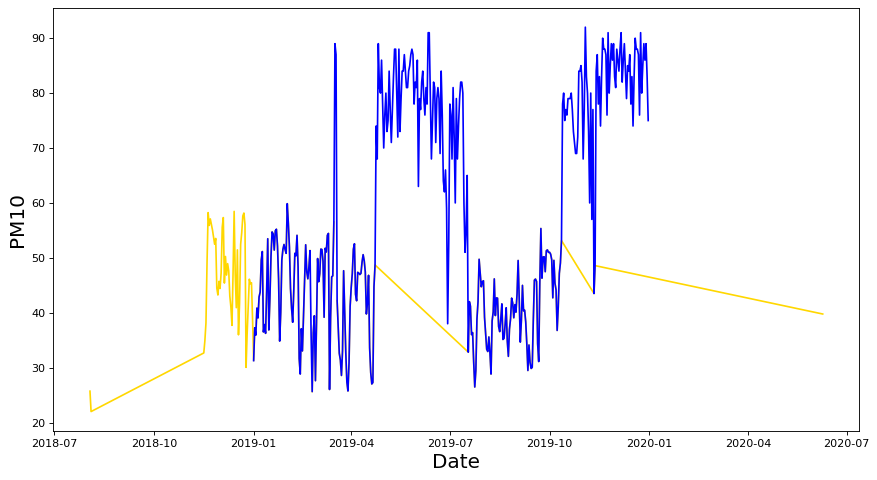

In [ ]:
plt.figure(figsize=(13, 7), dpi=80)
#plt.title('Serie PM1.0 delle quattro diverse centraline')
#plt.plot(Ap_wide["media_giorno_Ap"], color = 'gold')
plt.plot(x_3, color = 'gold')
plt.plot(umidita, color = 'blue')

plt.xlabel('Date', fontsize=18)
plt.ylabel('PM10', fontsize=18)
plt.show()

# Studio temperatura da A Primary

In [ ]:
x_4 = A_Primary.groupby(["datetime"])["Temperature_F"].mean()
print('Il numero di osservazioni giornaliere di partenza in cui non ci sono rilevazioni sulla temperatura è pari a ' + str(x_4.isna().count()))
# x_3.iloc[47:249] #.to_csv('/content/drive/MyDrive/x_3.iloc[47:249].csv')
mask_1 = esaustivo_con_vento_e_pressione['datetime'] == '2019-02-23'
a = esaustivo_con_vento_e_pressione.loc[mask_1] 
mask_2 = (esaustivo_con_vento_e_pressione['datetime'] >= '2019-03-17') & (esaustivo_con_vento_e_pressione['datetime'] <= '2019-03-18') 
e = esaustivo_con_vento_e_pressione.loc[mask_2]
mask_3 = (esaustivo_con_vento_e_pressione['datetime'] >= '2019-04-24') & (esaustivo_con_vento_e_pressione['datetime'] <= '2019-07-17') 
i = esaustivo_con_vento_e_pressione.loc[mask_3]
mask_4 = (esaustivo_con_vento_e_pressione['datetime'] >= '2019-10-13') & (esaustivo_con_vento_e_pressione['datetime'] <= '2019-11-10') 
o = esaustivo_con_vento_e_pressione.loc[mask_4]
mask_5 = (esaustivo_con_vento_e_pressione['datetime'] >= '2019-11-13') & (esaustivo_con_vento_e_pressione['datetime'] <= '2019-12-31') 
u = esaustivo_con_vento_e_pressione.loc[mask_5]

def get_celsius(x):
  '''It converts from Fahrenheit to Celsius'''
  formula = (x-32)*5/9
  return round(formula)

aa = x_4.iloc[47:100]
aa = aa.apply(get_celsius)
ee = x_4.iloc[101:122]
ee = ee.apply(get_celsius)
ii = x_4.iloc[124:160]
ii = ii.apply(get_celsius)
oo = x_4[160:247]
oo = oo.apply(get_celsius)
uu = x_4.iloc[247:-1]
uu = uu.apply(get_celsius)
temperatura = pd.DataFrame(pd.concat((aa, a['T Media'], ee, e['T Media'], ii, i['T Media'], oo, o['T Media'], uu, u['T Media']), axis = 0))
temperatura = temperatura.reset_index()
temperatura = temperatura.set_index(pd.date_range(start='2019/01/01', periods=365))
temperatura = temperatura.drop(columns = 'index')
temperatura = temperatura.rename(columns = {0: 'temperatura'})
temperatura

Il numero di osservazioni giornaliere di partenza in cui non ci sono rilevazioni sulla temperatura è pari a 250


,temperatura
2019-01-01,15
2019-01-02,14
2019-01-03,11
2019-01-04,9
2019-01-05,12
...,...
2019-12-27,14
2019-12-28,15
2019-12-29,14
2019-12-30,13


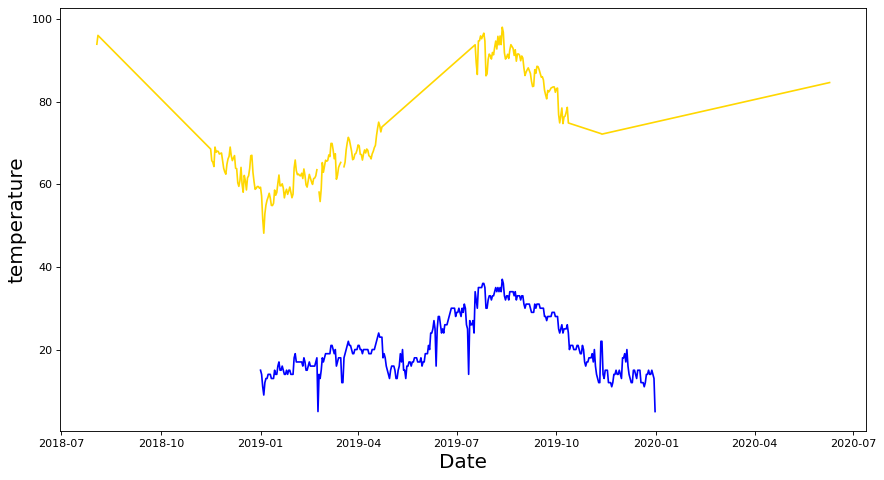

In [ ]:
plt.figure(figsize=(13, 7), dpi=80)
#plt.title('Serie PM1.0 delle quattro diverse centraline')
#plt.plot(Ap_wide["media_giorno_Ap"], color = 'gold')
plt.plot(x_4, color = 'gold')
plt.plot(temperatura, color = 'blue')

plt.xlabel('Date', fontsize=18)
plt.ylabel('temperature', fontsize=18)
plt.show() # poco senso così perché in blu sono celsius ed in giallo F

## Costruisco un nuovo dataframe con le serie

In [ ]:
dataset_finale = pd.read_excel(r'/content/drive/MyDrive/dataset_finale.xlsx')
dataset_finale['Vento'] = dataset_finale['Vento'].map(lambda x: x.rstrip(' km/h')) # elimino il ' km/' 
dataset_finale = dataset_finale.astype({"Vento": int})
df = dataset_finale.drop(columns = ['datetime', 'Wind Direction'])
df = df.rename(columns = {'T Media': 'Temperature', 'Vento': 'Wind Speed', 'H': 'Humidity', 'Pressione': 'Pressure'})  
corr = df.corr()
corr

,Temperature,Humidity,Wind Speed,Pressure,PM10
Temperature,1.000000,-0.053318,0.110460,-0.048425,-0.278347
Humidity,-0.053318,1.000000,-0.131721,-0.200410,0.084453
Wind Speed,0.110460,-0.131721,1.000000,-0.103615,-0.251867
Pressure,-0.048425,-0.200410,-0.103615,1.000000,0.156923
PM10,-0.278347,0.084453,-0.251867,0.156923,1.000000


In [ ]:
# from pandas.plotting import table 
# import matplotlib.pyplot as plt

# ax = plt.subplot(111, frame_on=False) # no visible frame
# ax.xaxis.set_visible(False)  # hide the x axis
# ax.yaxis.set_visible(False)  # hide the y axis

df = pd.read_excel(r'/content/drive/MyDrive/dataset_finale.xlsx')
df.head().to_latex()
# table(ax, df.head())
# plt.savefig('head_df.png')
# files.download("head_df.png") 

'\\begin{tabular}{lllrrlrr}\n\\toprule\n{} &   datetime & Wind Direction &  T Media &   H &    Vento &  Pressione &  PM10 \\\\\n\\midrule\n0 & 2019-01-01 &            NNE &        7 &  54 &  17 km/h &       1023 &    27 \\\\\n1 & 2019-01-02 &            ENE &        5 &  77 &  12 km/h &       1014 &    34 \\\\\n2 & 2019-01-03 &            NNE &        3 &  68 &  22 km/h &       1019 &     5 \\\\\n3 & 2019-01-04 &              N &        1 &  84 &  15 km/h &       1025 &     9 \\\\\n4 & 2019-01-05 &            NNW &        3 &  79 &   8 km/h &       1022 &    59 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
# i dati sul vento li prendo al 100% da internet
#total_PM10 = total_PM10.reindex(pd.date_range(start='2019/01/01', periods=365))
# total_PM10 = dataset_finale["PM10"]
# vento = pd.DataFrame(dataset_finale['Vento'])
# vento = vento.set_index(pd.date_range(start='2019/01/01', periods=365))
# df = pd.concat((temperatura, umidita, vento, pressione), axis = 1) # total_PM10,
# df = df.reset_index()
# df = pd.concat((total_PM10, df), axis = 1)
# df = df.rename(columns = {'index': 'datetime', 'temperatura': 'Temperature', 'Vento': 'Wind Speed', 'umidità': 'Humidity', 'pressione': 'Pressure'})  
# df['Wind Speed'] = df['Wind Speed'].map(lambda x: x.rstrip(' km/h')) # elimino il ' km/' 
# df = df.astype({"Wind Speed": int})
# df = df.drop(columns = ['datetime'])
# print(df)
# df.to_csv('/content/drive/MyDrive/dataframe_finale.csv') # esporto il dataframe


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

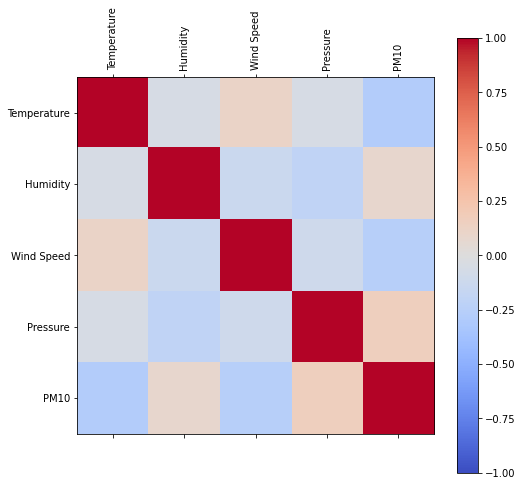

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)

# plt.savefig('correlazioni_non_standardizzate.png')
# files.download("correlazioni_non_standardizzate.png") 

plt.show()

## Linear Regressions

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

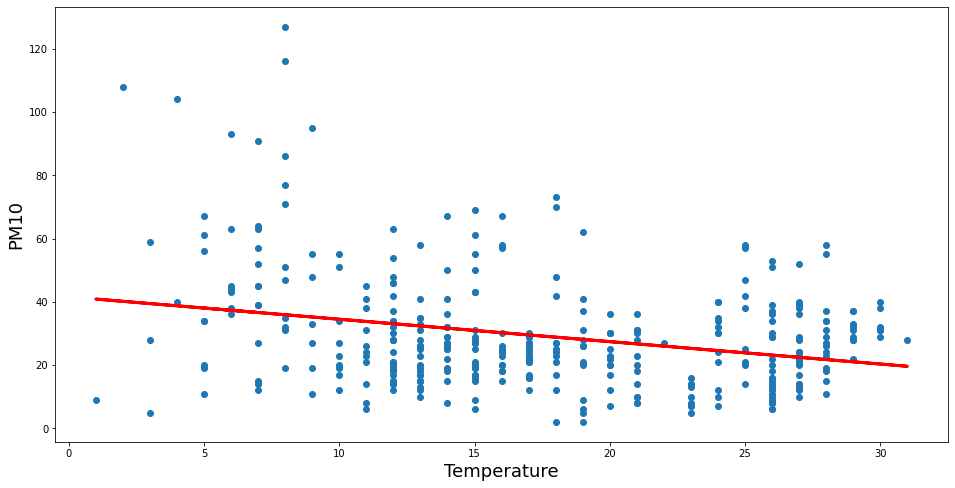

[[-0.70827519]]


In [ ]:
from sklearn.linear_model import LinearRegression

X = np.array(df['Temperature']).reshape(365, 1)
y = np.array(df['PM10']).reshape(365, 1)
regr = LinearRegression().fit(X, y)
PM10_y_pred = regr.predict(X)

plt.figure(figsize=(16,8))
plt.scatter(X, y)
plt.plot(X, PM10_y_pred, color='red', linewidth=3)
plt.xlabel('Temperature', fontsize=18)
plt.ylabel('PM10', fontsize=18)

plt.savefig('linear_regr_temp_PM10.png')
files.download("linear_regr_temp_PM10.png") 

plt.show()

print(regr.coef_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

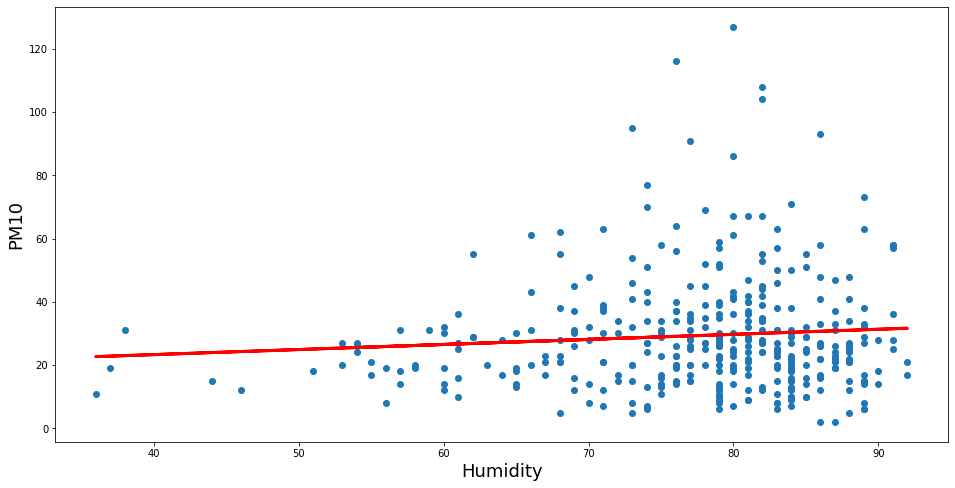

[[0.16031665]]


In [ ]:
X = np.array(df['Humidity']).reshape(365, 1)
y = np.array(df['PM10']).reshape(365, 1)
regr = LinearRegression().fit(X, y)
PM10_y_pred = regr.predict(X)

plt.figure(figsize=(16,8))
plt.scatter(X, y)
plt.plot(X, PM10_y_pred, color='red', linewidth=3)
plt.xlabel('Humidity', fontsize=18)
plt.ylabel('PM10', fontsize=18)

plt.savefig('linear_regr_hum_PM10.png')
files.download("linear_regr_hum_PM10.png") 

plt.show()

print(regr.coef_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

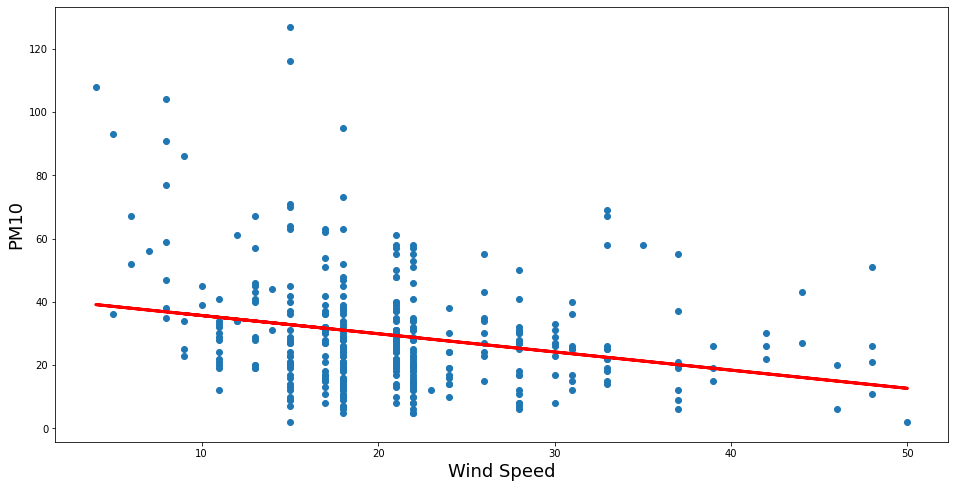

[[-0.57554627]]


In [ ]:
X = np.array(df['Wind Speed']).reshape(365, 1)
y = np.array(df['PM10']).reshape(365, 1)
regr = LinearRegression().fit(X, y)
PM10_y_pred = regr.predict(X)

plt.figure(figsize=(16,8))
plt.scatter(X, y)
plt.plot(X, PM10_y_pred, color='red', linewidth=3)
plt.xlabel('Wind Speed', fontsize=18)
plt.ylabel('PM10', fontsize=18)

plt.savefig('linear_regr_wind_PM10.png')
files.download("linear_regr_wind_PM10.png") 

plt.show()

print(regr.coef_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

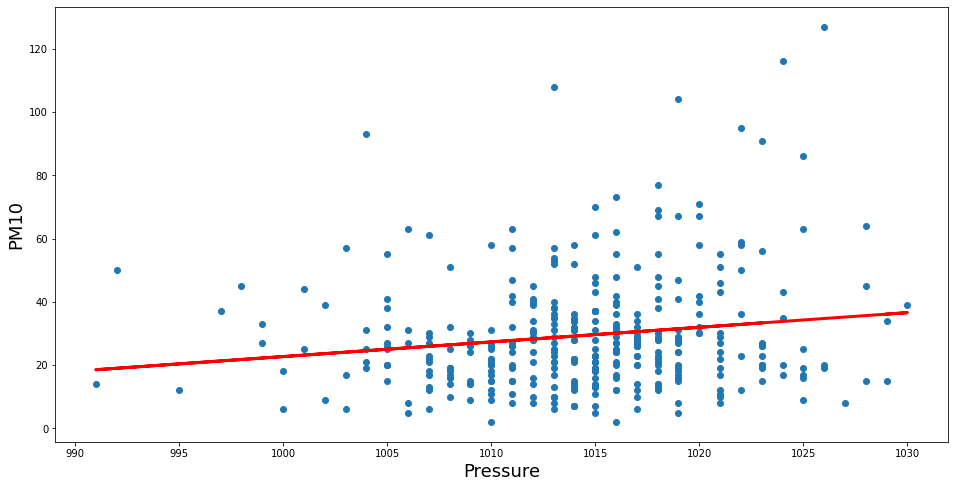

[[0.46278432]]


In [ ]:
X = np.array(df['Pressure']).reshape(365, 1)
y = np.array(df['PM10']).reshape(365, 1)
regr = LinearRegression().fit(X, y)
PM10_y_pred = regr.predict(X)

plt.figure(figsize=(16,8))
plt.scatter(X, y)
plt.plot(X, PM10_y_pred, color='red', linewidth=3)
plt.xlabel('Pressure', fontsize=18)
plt.ylabel('PM10', fontsize=18)

plt.savefig('linear_regr_pressure_PM10.png')
files.download("linear_regr_pressure_PM10.png") 

plt.show()

print(regr.coef_)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,17.315068,7.199429,1.0,12.0,16.0,24.0,31.0
Humidity,365.0,77.438356,9.650466,36.0,73.0,79.0,84.0,92.0
Wind Speed,365.0,21.046575,8.016845,4.0,17.0,21.0,24.0,50.0
Pressure,365.0,1014.306849,6.211836,991.0,1011.0,1015.0,1018.0,1030.0
PM10,365.0,29.320548,18.319471,2.0,18.0,26.0,36.0,127.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

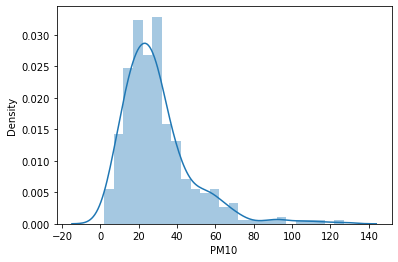

In [ ]:
fig = sns.distplot(df['PM10']) #.savefig("/content/drive/MyDrive/distr_PM10.png")
plt.savefig("distr_PM10.png")
files.download("distr_PM10.png") 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

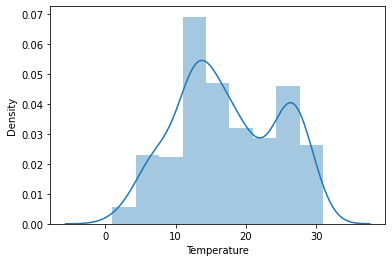

In [ ]:
sns.distplot(df['Temperature'])
plt.savefig("distr_temperature.png")
files.download("distr_temperature.png") 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

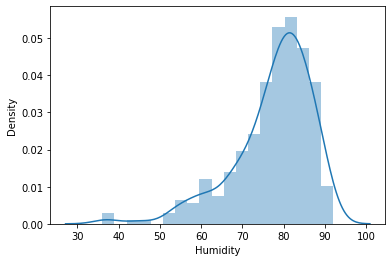

In [ ]:
sns.distplot(df['Humidity'])
plt.savefig("distr_umidita.png")
files.download("distr_umidita.png") 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

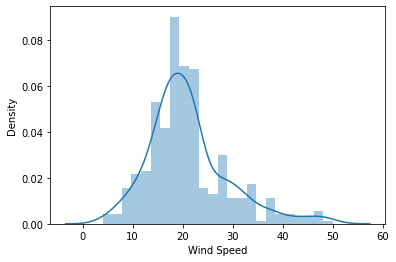

In [ ]:
sns.distplot(df['Wind Speed'])
plt.savefig("distr_wind_speed.png")
files.download("distr_wind_speed.png") 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

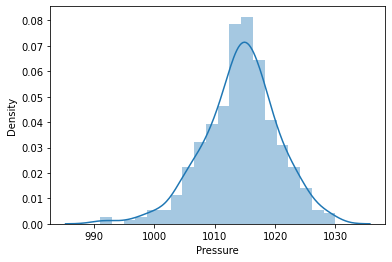

In [ ]:
sns.distplot(df['Pressure']) 
plt.savefig("distr_pressione.png")
files.download("distr_pressione.png") 
# La pressione atmosferica non è altro che una misura del peso di tutta l'aria che si trova sopra la nostra testa;
# in particolare la pressione atmosferica, come è definita in meteorologia, indica il peso della colonna d'aria che sovrasta una superficie 
# di 1 metro quadrato

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

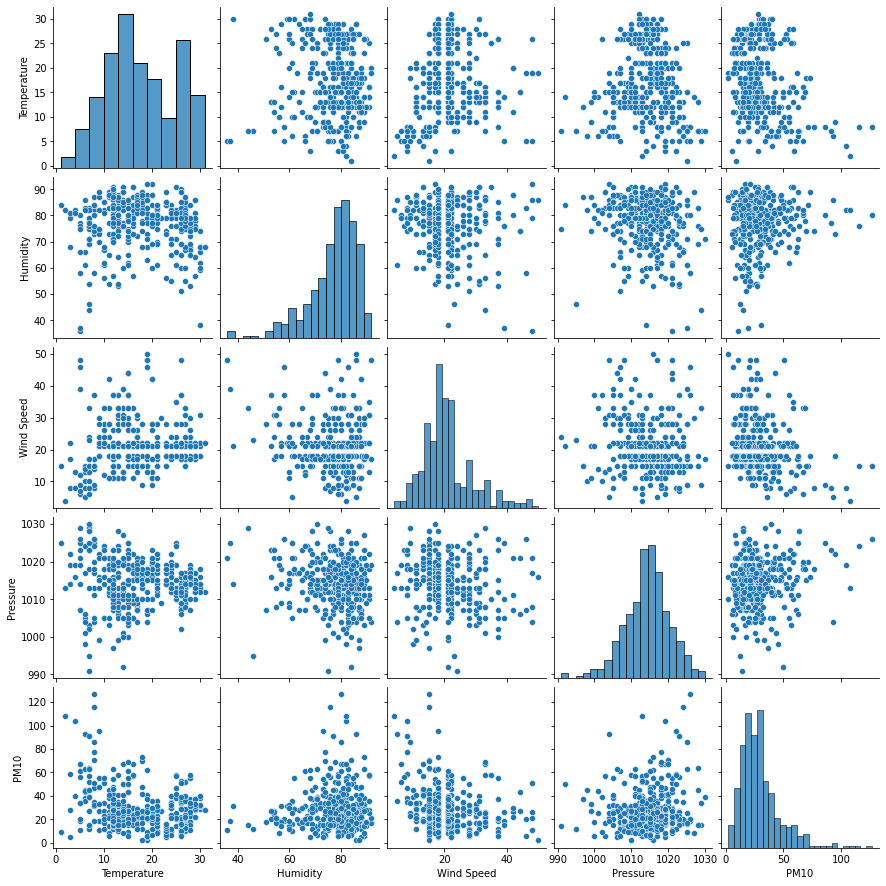

In [ ]:
try:
    sns.pairplot(df)
except RuntimeError as re:
    if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
        sns.pair(df, kde_kws={'bw': 0.1})
    else:
        raise re

# plt.savefig("/content/drive/MyDrive/matrice_dispersione.png")
plt.savefig("matrice_dispersione.png")
files.download("matrice_dispersione.png") 

In [ ]:
# boxplots of each variables
# A_Primary=pd.read_csv(r'/content/drive/MyDrive/A_Primary_08_01_2018_11_30_2020.csv')
# A_Primary = A_Primary.drop(columns = ['created_at', 'entry_id', 'UptimeMinutes', 'RSSI_dbm', 'Unnamed: 10'])
# print(A_Primary.columns)
# for i in A_Primary.columns:
#     A_Primary.boxplot(column=i)
#     plt.show()

## Nuova variabile: Wind Direction

In [ ]:
plt.figure(figsize=(13, 7), dpi=80)
ds_per_wind = pd.read_excel(r'/content/drive/MyDrive/dataset_finale.xlsx')
#sns.catplot(x="Wind Direction", kind="count", palette="ch:.25", data=ds_per_wind)
#plt.hist(ds_per_wind['Wind Direction'])
# plt.show()
ds_per_wind['Wind Direction'].value_counts() #.sort_index().plot.bar() # il vento più presente è il Grecale

NE     74
WSW    69
ENE    42
SW     36
SSW    30
W      22
NNE    21
SSE    11
ESE    10
NW      9
WNW     9
NNW     9
S       8
SE      8
E       6
N       1
Name: Wind Direction, dtype: int64

<Figure size 1040x560 with 0 Axes>

In [ ]:
# rappresentazione della velocità del vento in un piano bidimensionale
# per gli angoli dei venti: http://www.physicalgeography.net/fundamentals/7n.html

ds_per_wind['Vento'] = ds_per_wind['Vento'].map(lambda x: x.rstrip(' km/h')) # elimino il ' km/'
ds_per_wind = ds_per_wind.astype({"Vento": int}) # trasformo in interi
# creo la colonna 'angolo_vento' rimpiazzando le direzioni del vento con gli angoli
ds_per_wind['angolo_vento'] = ds_per_wind['Wind Direction'].replace('N', 360.0).replace('NNE', 22.5).replace('NE', 45.0).replace('ENE', 67.5).replace(
  'E', 90.0).replace('ESE', 112.5).replace('SE', 135.0).replace('SSE', 157.5).replace('S', 180.0).replace('SSW', 202.5).replace('SW', 225.0).replace(
    'WSW', 247.5).replace('W', 270.0).replace('WNW', 292.5).replace('NW', 315.0).replace('NNW', 337.5)
ds_per_wind['vento_x'] = ds_per_wind['Vento'] * np.sin(ds_per_wind['angolo_vento'] * 3.14 / 180.0)
ds_per_wind['vento_y'] = ds_per_wind['Vento'] * np.cos(ds_per_wind['angolo_vento'] * 3.14 / 180.0)

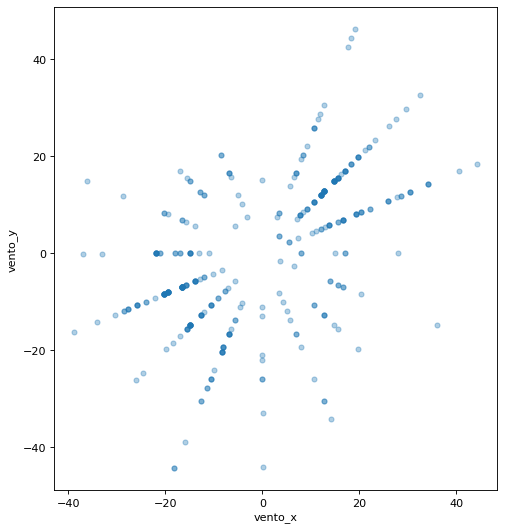

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
ds_per_wind.plot(kind='scatter', x='vento_x', y='vento_y', alpha=0.35, ax=ax)

In [ ]:
#ds_per_wind.head(30)

In [ ]:
# !pip install windrose
#ds_per_wind.angolo_vento.value_counts()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

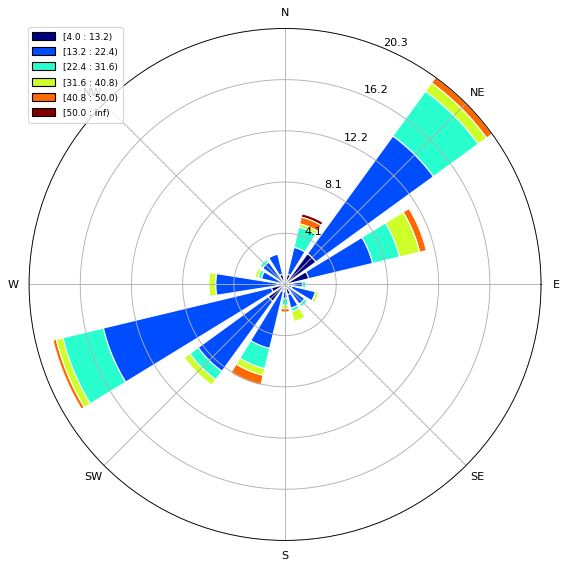

In [ ]:
# windrose non proporzionale
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(ds_per_wind.angolo_vento, ds_per_wind.Vento, normed=True, opening=0.8, edgecolor='white')
ax.set_legend(loc = 'upper left')
ax.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])

plt.savefig('windrose.png')
files.download("windrose.png") 

plt.show()

## Correlazione tra PM10 e direzione del vento

In [ ]:
# calcola_correlazione = pd.concat((pd.get_dummies(ds_per_wind['Wind Direction']), ds_per_wind['PM10']), axis = 1)
# calcola_correlazione.corr()

## Relazione tra direzione del vento e intensità (min, mean, max)

In [ ]:
print('Valori medi per vento:' )
print(pd.concat((ds_per_wind['Wind Direction'], ds_per_wind['PM10']), axis = 1).groupby('Wind Direction')['PM10'].mean())
print('Valori minimi per vento:' )
print(pd.concat((ds_per_wind['Wind Direction'], ds_per_wind['PM10']), axis = 1).groupby('Wind Direction')['PM10'].min())
print('Valori massimi per vento:' )
print(pd.concat((ds_per_wind['Wind Direction'], ds_per_wind['PM10']), axis = 1).groupby('Wind Direction')['PM10'].max())

Valori medi per vento:
Wind Direction
E      38.000000
ENE    32.761905
ESE    40.100000
N       9.000000
NE     28.162162
NNE    23.619048
NNW    30.000000
NW     39.222222
S      28.750000
SE     47.750000
SSE    32.818182
SSW    27.600000
SW     30.916667
W      26.772727
WNW    20.333333
WSW    26.072464
Name: PM10, dtype: float64
Valori minimi per vento:
Wind Direction
E      24
ENE     6
ESE    15
N       9
NE      2
NNE     2
NNW    16
NW     21
S      19
SE     18
SSE     6
SSW    12
SW      6
W       6
WNW     5
WSW     5
Name: PM10, dtype: int64
Valori massimi per vento:
Wind Direction
E       50
ENE    127
ESE    108
N        9
NE      93
NNE     45
NNW     59
NW      91
S       43
SE     116
SSE     86
SSW     63
SW      77
W       67
WNW     36
WSW     67
Name: PM10, dtype: int64


## Creo le serie di dati reali per il 2019 di PM2.5 e PM1. Mi serviranno in un secondo per creare un file excel da fornire al cliente che si aggiorna quotidianamente con l'utilizzo della web-app

In [ ]:
#PM1

df = pd.concat((Ap_wide_PM1['media_giorno_Ap'], Bp_wide_PM1['media_giorno_Bp'], As_wide_PM1['media_giorno_As'], Bs_wide_PM1['media_giorno_Bs']), axis = 0)
df = pd.DataFrame(df.groupby(['datetime']).mean())
pm1_2019 = df.iloc[47:-1]  # osservazioni solo del 2019
pm1_2019 = pm1_2019.rename(columns = {0: 'PM1'})
pm1_2019['datetime'] = pm1_2019.index
r = pd.date_range(start = pm1_2019.datetime.min(), end = '2019-12-31')
pm1 = pm1_2019.set_index('datetime').reindex(r).fillna(0).rename_axis('datetime').reset_index()
pm1 = pm1.round()
pm1.PM1 = pm1.PM1.astype(int)
pm1 = pm1.PM1.replace(0, np.nan)
pm1.head(20)
pm1.to_excel('/content/drive/MyDrive/pm1.xlsx')

In [ ]:
#PM2.5

df_2 = pd.concat((Ap_wide_PM25['media_giorno_Ap'], Bp_wide_PM25['media_giorno_Bp']), axis = 0)
df_2 = pd.DataFrame(df_2.groupby(['datetime']).mean())

pm25_2019 = df_2.iloc[47:-1]  # osservazioni solo del 2019
pm25_2019 = pm25_2019.rename(columns = {0: 'PM2_5'})
pm25_2019['datetime'] = pm25_2019.index
r = pd.date_range(start = pm25_2019.datetime.min(), end = '2019-12-31')
pm25 = pm25_2019.set_index('datetime').reindex(r).fillna(0).rename_axis('datetime').reset_index()
pm25 = pm25.round()
# pm25.replace(np.nan, 0)
pm25.PM2_5 = pm25.PM2_5.astype(int)
pm25 = pm25.PM2_5.replace(0, np.nan)

# df_2 = pd.concat((Ap_wide_PM25['media_giorno_Ap'], Bp_wide_PM25['media_giorno_Bp']), axis = 0)
# df_2 = pd.DataFrame(df_2.groupby(['datetime']).mean())
# pm1_2019 = df.iloc[47:-1]  # osservazioni solo del 2019
# pm1_2019 = pm1_2019.rename(columns = {0: 'PM1'})
# pm1_2019['datetime'] = pm1_2019.index
# r = pd.date_range(start = pm1_2019.datetime.min(), end = '2019-12-31')
# pm1 = pm1_2019.set_index('datetime').reindex(r).fillna(0).rename_axis('datetime').reset_index()
# pm1 = pm1.round()
# pm1.PM1 = pm1.PM1.astype(int)
# pm1 = pm1.PM1.replace(0, np.nan)
# pm1.head(20)
# pm25.to_excel('/content/drive/MyDrive/pm25.xlsx')

In [ ]:
pm25.sum()

3372.0

In [ ]:
pm1.sum()

3372.0